In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [2]:
#%load_ext autoreload
#%autoreload 2

In [2]:
%display latex
import ulbc
from flowstar import *
from ulbc.bondcalculus import *

In [3]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [25]:
y = vector([
    50*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [26]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [27]:
system = ulbc.System(R, R.gens(), y0, y); system

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 50*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [28]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(system,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [ ]:
reach = system.reach(
    5, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=150,
    integration_method=ulbc.IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
)

In [ ]:
p = reach.sage_interval_plot("x4", "x6")
p.set_aspect_ratio(1/20)
p

In [ ]:
q = p
q += region_plot(var("x6") > 1,
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 incol='coral',
                 alpha=0.8,
                 bordercol='coral',
                 borderstyle='--')
q += region_plot(prop(0.032),
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 incol='darkseagreen',
                 alpha=0.8,
                 bordercol='darkseagreen',
                 borderstyle='--')
q.set_aspect_ratio(1/20)
q

In [13]:
import importlib
importlib.reload(ulbc)

<module 'ulbc' from '/home/twright/Documents/PhD/Notebooks/ulbc/__init__.py'>

In [9]:
P = ulbc.Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [10]:
def prop(k):
    return (500/4)**2*(var("x4") - 0.003)**2 + 3*(var("x6") - 0.5)**2 < k

In [11]:
Q = ulbc.Atomic(prop(0.032)); Q

Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0320000000000000)

In [12]:
obs = Q.observer(reach, symbolic_composition=True,
                 symbolic_composition_order=-1)

PolyObserver(-15625*x4^2 - 3*x6^2 + 93.75000000000001?*x4 + 3*x6 - 0.858625000000000?, <flowstar.reachability.Reach object at 0x7f85de7fe370>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6, symbolic_composition=True, symbolic_composition_order=-1, tentative_unpreconditioning=False, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6


In [13]:
fobs = Q.observer(reach, symbolic_composition=False)

PolyObserver(-15625*x4^2 - 3*x6^2 + 93.75000000000001?*x4 + 3*x6 - 0.858625000000000?, <flowstar.reachability.Reach object at 0x7f85de7fe370>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=False, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6


In [14]:
def up(t):
    return obs(t).upper()

def lo(t):
    return obs(t).lower()

In [15]:
#Q.sage_plot(reach, symbolic_composition=False)

In [16]:
upp = lambda t: log(max(lo(t), 0))
lop = lambda t: log(max(-lo(t), 0))

In [17]:
one = lambda t: 1

In [18]:
def wrap_log(f,s):
    def g(t):
        try:
            return log(max(s*f(t), 1e-3), 10)
        except:
            return 1e-3
    return g

upp = wrap_log(up, 1)
upn = wrap_log(up, -1)
lon = wrap_log(lo, -1)
lop = wrap_log(lo, 1)

In [19]:
sage.plot((upp, lop, upn, lon), (0, 5))

TypeError: 'module' object is not callable

In [ ]:
#Q.sage_plot(reach, symbolic_composition=True)

PolyObserver(-15625*x4^2 - 3*x6^2 + 93.75000000000001?*x4 + 3*x6 - 0.858625000000000?, <flowstar.reachability.Reach object at 0x7f85de7fe370>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6


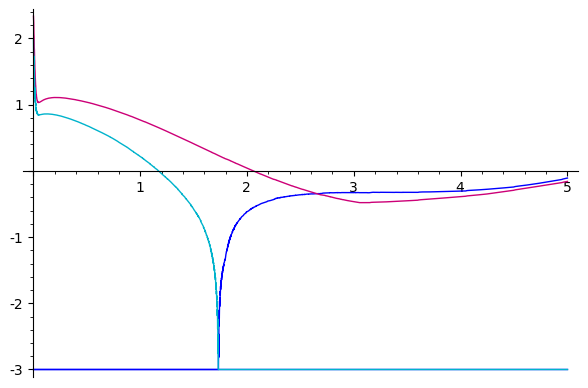

In [21]:
Q.sage_plot(reach, symbolic_composition=False, log=True)

In [22]:
help(log)

Help on function log in module sage.functions.log:

log(*args, **kwds)
    Return the logarithm of the first argument to the base of
    the second argument which if missing defaults to ``e``.
    
    It calls the ``log`` method of the first argument when computing
    the logarithm, thus allowing the use of logarithm on any object
    containing a ``log`` method. In other words, ``log`` works
    on more than just real numbers.
    
    EXAMPLES::
    
        sage: log(e^2)
        2
    
    To change the base of the logarithm, add a second parameter::
    
        sage: log(1000,10)
        3
    
    The synonym ``ln`` can only take one argument::
    
        sage: ln(RDF(10))
        2.302585092994046
        sage: ln(2.718)
        0.999896315728952
        sage: ln(2.0)
        0.693147180559945
        sage: ln(float(-1))
        3.141592653589793j
        sage: ln(complex(-1))
        3.141592653589793j
    
    You can use
    :class:`RDF<sage.rings.real_double.RealDoubleF

PolyObserver(-15625*x4^2 - 3*x6^2 + 93.75000000000001?*x4 + 3*x6 - 0.858625000000000?, <flowstar.reachability.Reach object at 0x7f85de7fe370>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6, symbolic_composition=True, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 90.750000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 9075*x4 + 150*x5 - 3*x6


/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


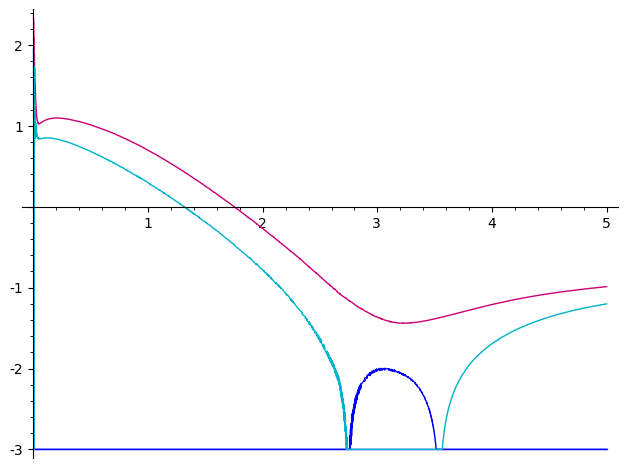

In [20]:
Q.sage_plot(reach, symbolic_composition=True, log=True)

In [ ]:
Q.signal(reach, symbolic_composition=True).plot()